In [78]:
!pip install plotly==2.7.0
!pip install xgboost
!pip install shap 

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import sklearn.metrics as mt

import shap

In [3]:
kpopgroups= pd.read_csv("kpop_groups.csv")
df = kpopgroups.copy()
df

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.566   0.716    1       0.0424       0.00691   
1              1         0.764   0.526   11       0.2120       0.04840   
2              2         0.547   0.605    8       0.0415       0.42000   
3              3         0.703   0.321    4       0.8840       0.86400   
4              4         0.787   0.669    5       0.0428       0.00782   
...          ...           ...     ...  ...          ...           ...   
5979        5979         0.745   0.951    5       0.0527       0.04280   
5980        5980         0.790   0.853   11       0.0665       0.00116   
5981        5981         0.745   0.951    5       0.0527       0.04280   
5982        5982         0.790   0.853   11       0.0666       0.00116   
5983        5983         0.745   0.951    5       0.0527       0.04280   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.3700    0.450   81.068    -5.733     1   
1             0.000000    0.0718    0.588  114.910    -7.355     1   
2             0.000000    0.1250    0.364  121.953    -6.755     1   
3             0.000000    0.9080    0.544  114.822   -13.135     1   
4             0.000000    0.1230    0.570  104.994    -4.333     0   
...                ...       ...      ...      ...       ...   ...   
5979          0.003860    0.2030    0.606  127.945    -2.425     1   
5980          0.000042    0.3290    0.713  124.998    -4.564     0   
5981          0.003860    0.2030    0.606  127.957    -2.425     1   
5982          0.000042    0.3290    0.713  125.000    -4.564     0   
5983          0.003860    0.2030    0.606  127.945    -2.425     1   

      duration_ms  time_signature artist_name release_date  \
0          207481               4         BTS   2020-11-20   
1          222243               4         BTS   2020-11-20   
2          254950               4         BTS   2020-11-20   
3          179548               4         BTS   2020-11-20   
4          202313               4         BTS   2020-11-20   
...           ...             ...         ...          ...   
5979       200303               4        ITZY   2019-02-14   
5980       199874               4        ITZY   2019-02-12   
5981       200303               4        ITZY   2019-02-12   
5982       199874               4        ITZY   2019-02-12   
5983       200303               4        ITZY   2019-02-12   

               song_name song_name_formatted  
0           Life Goes On        life-goes-on  
1         Fly To My Room      fly-to-my-room  
2            Blue & Grey           blue-grey  
3                   Skit                skit  
4              Telepathy           telepathy  
...                  ...                 ...  
5979            WANT IT?                want  
5980  달라달라 (DALLA DALLA)                 NaN  
5981            WANT IT?                want  
5982  달라달라 (DALLA DALLA)                 NaN  
5983            WANT IT?                want  

[5984 rows x 18 columns]

In [4]:
year = df["release_date"].apply(lambda x: x.split('-')[0])
df.insert(15,"year",year)

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['artist_name'] = [i.lower().replace("'", '') for i in df.artist_name]

In [6]:
df = df.drop(columns=["Unnamed: 0"])
df

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0            0.566   0.716    1       0.0424       0.00691          0.000000   
1            0.764   0.526   11       0.2120       0.04840          0.000000   
2            0.547   0.605    8       0.0415       0.42000          0.000000   
3            0.703   0.321    4       0.8840       0.86400          0.000000   
4            0.787   0.669    5       0.0428       0.00782          0.000000   
...            ...     ...  ...          ...           ...               ...   
5979         0.745   0.951    5       0.0527       0.04280          0.003860   
5980         0.790   0.853   11       0.0665       0.00116          0.000042   
5981         0.745   0.951    5       0.0527       0.04280          0.003860   
5982         0.790   0.853   11       0.0666       0.00116          0.000042   
5983         0.745   0.951    5       0.0527       0.04280          0.003860   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0       0.3700    0.450   81.068    -5.733     1       207481               4   
1       0.0718    0.588  114.910    -7.355     1       222243               4   
2       0.1250    0.364  121.953    -6.755     1       254950               4   
3       0.9080    0.544  114.822   -13.135     1       179548               4   
4       0.1230    0.570  104.994    -4.333     0       202313               4   
...        ...      ...      ...       ...   ...          ...             ...   
5979    0.2030    0.606  127.945    -2.425     1       200303               4   
5980    0.3290    0.713  124.998    -4.564     0       199874               4   
5981    0.2030    0.606  127.957    -2.425     1       200303               4   
5982    0.3290    0.713  125.000    -4.564     0       199874               4   
5983    0.2030    0.606  127.945    -2.425     1       200303               4   

     artist_name  year release_date           song_name song_name_formatted  
0            bts  2020   2020-11-20        Life Goes On        life-goes-on  
1            bts  2020   2020-11-20      Fly To My Room      fly-to-my-room  
2            bts  2020   2020-11-20         Blue & Grey           blue-grey  
3            bts  2020   2020-11-20                Skit                skit  
4            bts  2020   2020-11-20           Telepathy           telepathy  
...          ...   ...          ...                 ...                 ...  
5979        itzy  2019   2019-02-14            WANT IT?                want  
5980        itzy  2019   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5981        itzy  2019   2019-02-12            WANT IT?                want  
5982        itzy  2019   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5983        itzy  2019   2019-02-12            WANT IT?                want  

[5984 rows x 18 columns]

In [7]:
df.describe().T

count           mean           std           min  \
danceability      5984.0       0.653703      0.123452      0.000000   
energy            5984.0       0.759343      0.161465      0.002770   
key               5984.0       5.380515      3.543256      0.000000   
speechiness       5984.0       0.096219      0.089620      0.000000   
acousticness      5984.0       0.180083      0.215273      0.000005   
instrumentalness  5984.0       0.042525      0.177240      0.000000   
liveness          5984.0       0.225994      0.200193      0.010800   
valence           5984.0       0.550064      0.207912      0.000000   
tempo             5984.0     121.608275     25.732910      0.000000   
loudness          5984.0      -4.741049      2.302029    -27.191000   
mode              5984.0       0.569686      0.495161      0.000000   
duration_ms       5984.0  209547.997828  38231.198723  12640.000000   
time_signature    5984.0       3.970588      0.232286      0.000000   

                            25%          50%            75%         max  
danceability           0.582000       0.6690       0.739000       0.958  
energy                 0.681750       0.8030       0.876000       0.995  
key                    2.000000       6.0000       8.000000      11.000  
speechiness            0.043200       0.0662       0.113000       0.936  
acousticness           0.027475       0.0933       0.244250       0.995  
instrumentalness       0.000000       0.0000       0.000002       0.965  
liveness               0.094175       0.1440       0.306000       0.980  
valence                0.390000       0.5590       0.710250       0.978  
tempo                102.728000     120.0715     136.072750     216.146  
loudness              -5.527000      -4.4100      -3.278500       0.039  
mode                   0.000000       1.0000       1.000000       1.000  
duration_ms       192568.750000  209875.0000  228293.250000  588120.000  
time_signature         4.000000       4.0000       4.000000       5.000

In [8]:
df.columns

Index(['danceability', 'energy', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness', 'mode',
       'duration_ms', 'time_signature', 'artist_name', 'year', 'release_date',
       'song_name', 'song_name_formatted'],
      dtype='object')

In [9]:
df.isnull().sum()

danceability             0
energy                   0
key                      0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
loudness                 0
mode                     0
duration_ms              0
time_signature           0
artist_name              0
year                     0
release_date             0
song_name                0
song_name_formatted    675
dtype: int64

In [10]:
df.artist_name.value_counts()

bts                 994
blackpink           502
winner              500
girls generation    494
exo                 418
twice               410
nct 127             369
got7                360
red velvet          300
stray kids          273
gfriend             270
monsta x            265
mamamoo             236
exid                187
astro               163
itzy                155
everglow             51
wanna one            37
Name: artist_name, dtype: int64

In [11]:
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
key= df['key'].map(key_mapping)
key.head()

0    C♯,D♭
1        B
2    G♯,A♭
3        E
4        F
Name: key, dtype: object

In [12]:
time_mapping = {0:'0/4', 1: '1/4', 2: '2/4', 3: '3/4', 4: '4/4', 5: '5/4'}
time_signature = df['time_signature'].map(time_mapping)
time_signature.head()

0    4/4
1    4/4
2    4/4
3    4/4
4    4/4
Name: time_signature, dtype: object

In [13]:
df.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name  year release_date       song_name song_name_formatted  
0         bts  2020   2020-11-20    Life Goes On        life-goes-on  
1         bts  2020   2020-11-20  Fly To My Room      fly-to-my-room  
2         bts  2020   2020-11-20     Blue & Grey           blue-grey  
3         bts  2020   2020-11-20            Skit                skit  
4         bts  2020   2020-11-20       Telepathy           telepathy

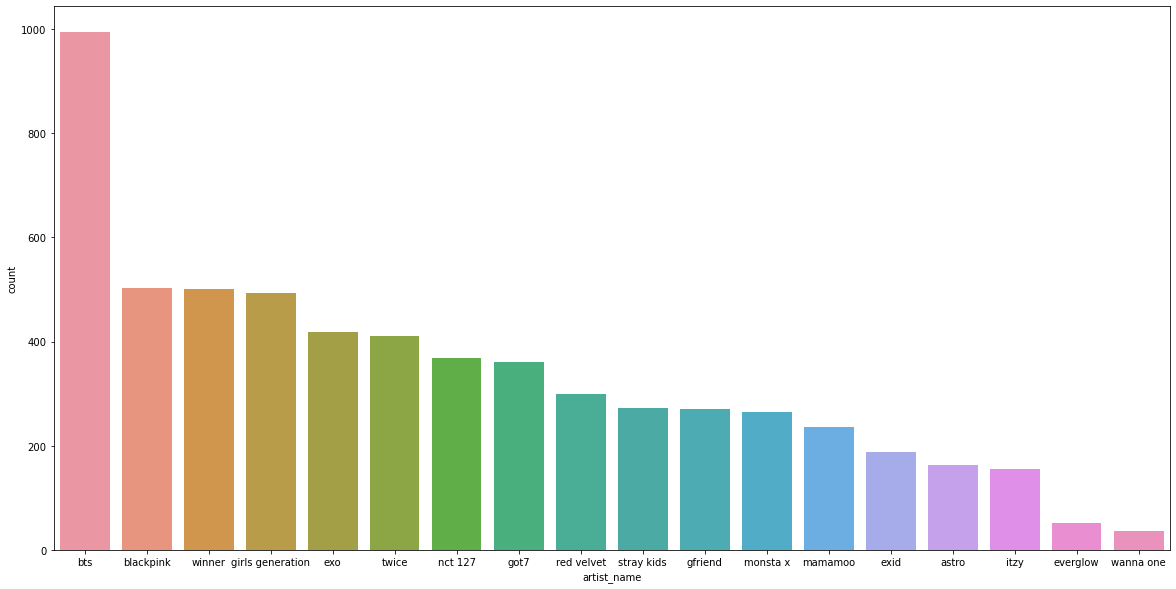

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'artist_name', data=df, order=df['artist_name'].value_counts().index);

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_20308/3006639004.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_20308/3006639004.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



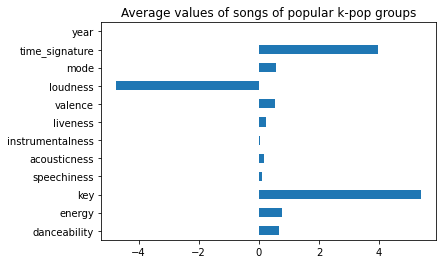

In [15]:
table = df.drop(["duration_ms","tempo"], axis=1)
table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");

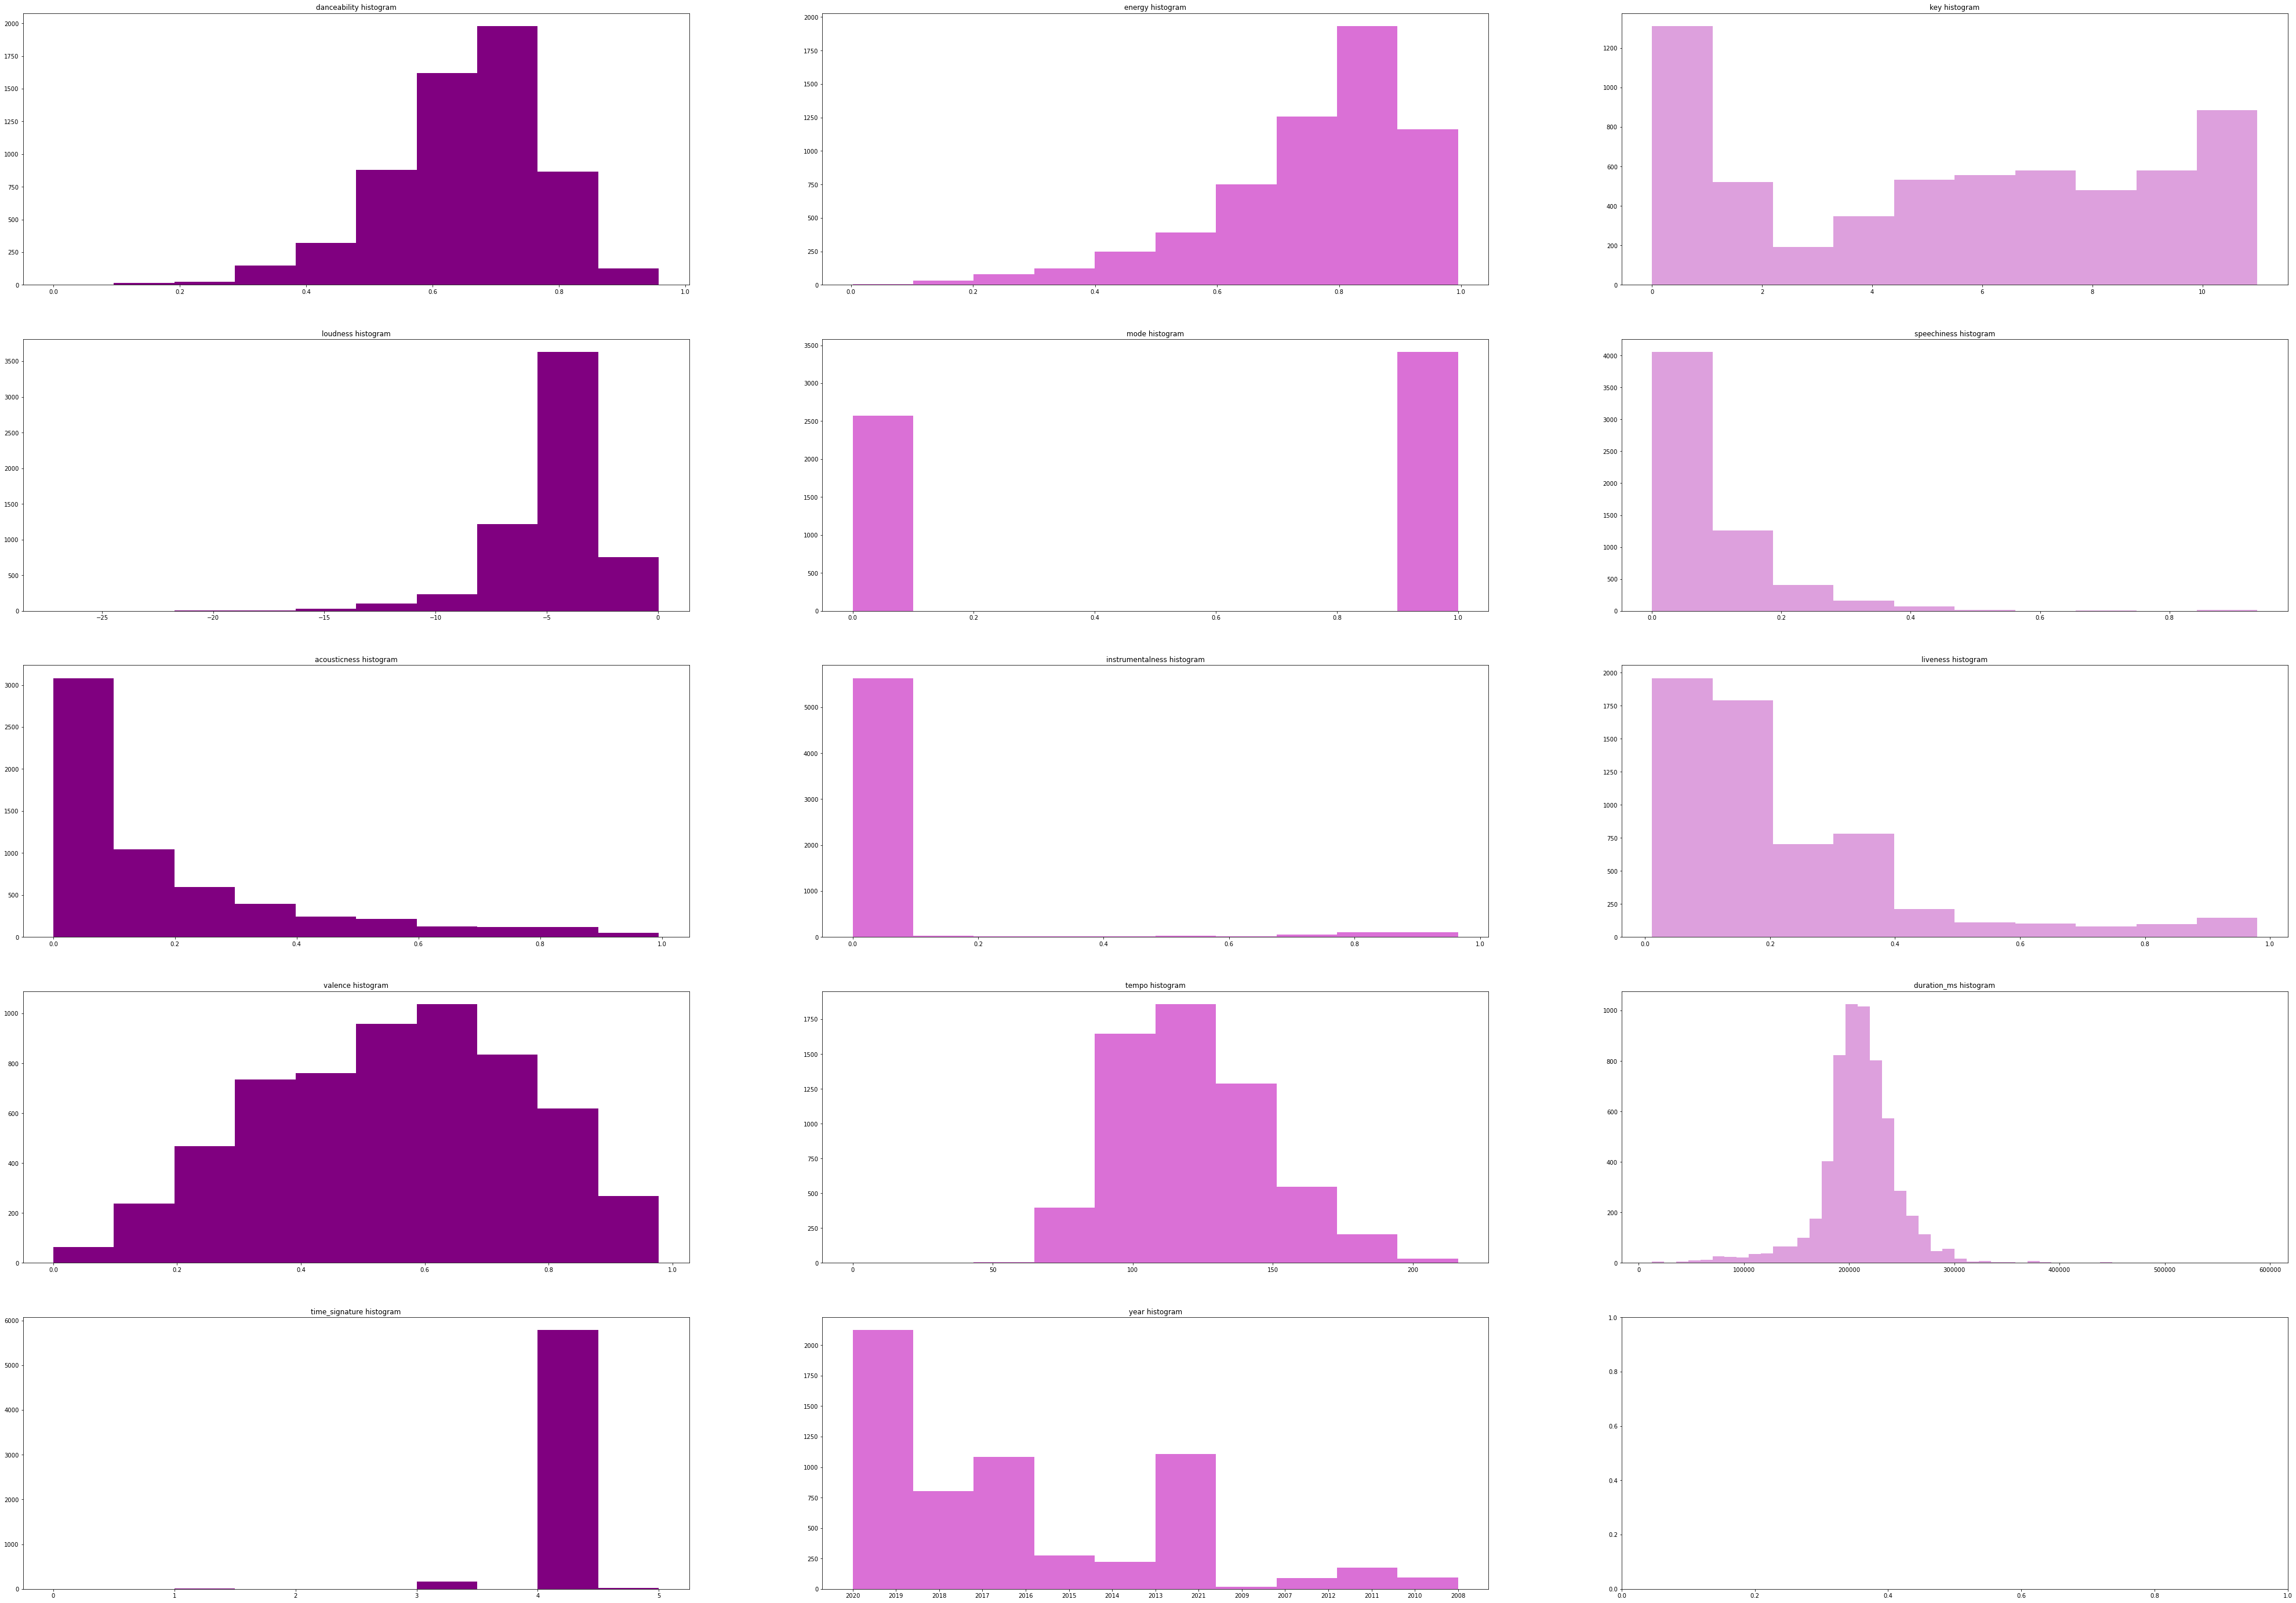

In [16]:
fig, ax = plt.subplots(5,3, figsize=(70,50))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'purple')
hist_plot(4,1, 'year', 10, 'orchid')

plt.show()

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



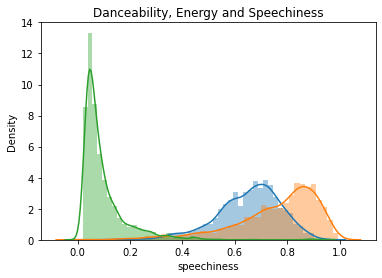

In [17]:
sns.distplot(df['danceability']); #the blue one
sns.distplot(df['energy']); #the orange one
sns.distplot(df['speechiness']).set_title("Danceability, Energy and Speechiness"); #the green one

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



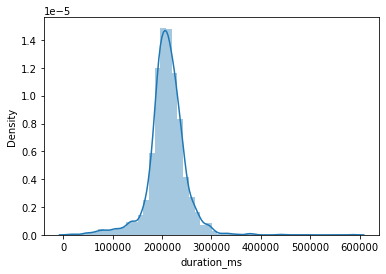

In [18]:
sns.distplot(df['duration_ms']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



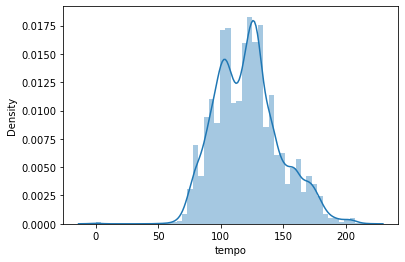

In [19]:
sns.distplot(df['tempo']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



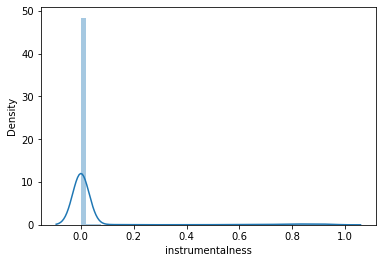

In [20]:
sns.distplot(df['instrumentalness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



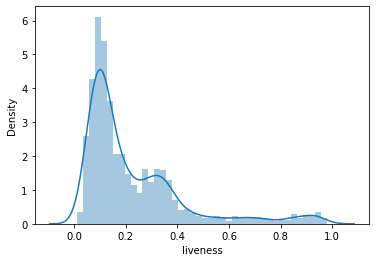

In [21]:
sns.distplot(df['liveness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



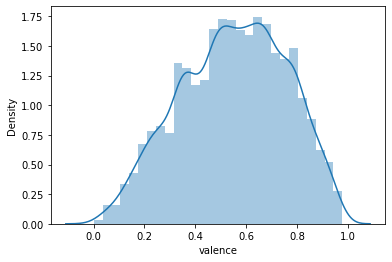

In [22]:
sns.distplot(df['valence']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



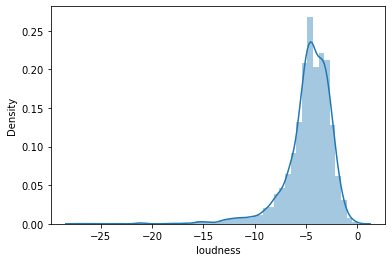

In [23]:
sns.distplot(df['loudness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



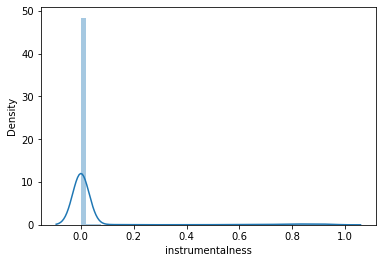

In [24]:
sns.distplot(df['instrumentalness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



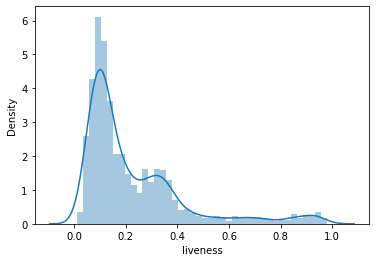

In [25]:
sns.distplot(df['liveness']);

In [26]:
mode_mapping = {1.0: "major", 0.0: "minor"}
mode = df['mode'].map(mode_mapping)

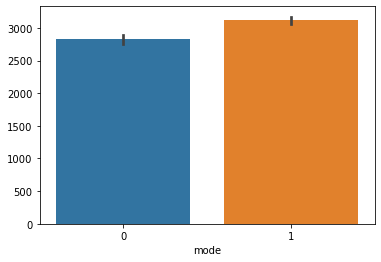

In [27]:
sns.barplot(x="mode", y=df["mode"].index, data=df);

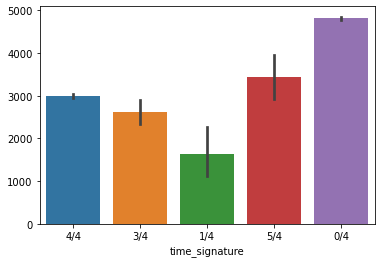

In [28]:
sns.barplot(x=time_signature, y=time_signature.index, data=df);

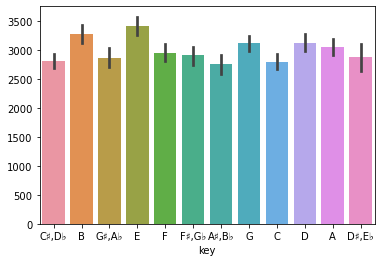

In [29]:
sns.barplot(x=key, y=key.index, data=df);

In [30]:
df.corr()

danceability    energy       key  speechiness  acousticness  \
danceability          1.000000  0.202751  0.040171    -0.065743     -0.253472   
energy                0.202751  1.000000  0.037158     0.113372     -0.590077   
key                   0.040171  0.037158  1.000000     0.033211     -0.054913   
speechiness          -0.065743  0.113372  0.033211     1.000000     -0.054525   
acousticness         -0.253472 -0.590077 -0.054913    -0.054525      1.000000   
instrumentalness     -0.105600 -0.250540 -0.012638    -0.101673      0.106138   
liveness             -0.160284  0.155644 -0.008362     0.104471      0.009281   
valence               0.475630  0.435548  0.042249     0.046202     -0.234692   
tempo                -0.108210  0.096240  0.020201     0.077879     -0.065891   
loudness              0.233581  0.734630  0.003312    -0.097021     -0.416909   
mode                 -0.117193 -0.120867 -0.153774    -0.065988      0.131610   
duration_ms          -0.127039  0.013664 -0.023826    -0.108418      0.014307   
time_signature        0.162976  0.098785  0.031267    -0.041829     -0.091460   

                  instrumentalness  liveness   valence     tempo  loudness  \
danceability             -0.105600 -0.160284  0.475630 -0.108210  0.233581   
energy                   -0.250540  0.155644  0.435548  0.096240  0.734630   
key                      -0.012638 -0.008362  0.042249  0.020201  0.003312   
speechiness              -0.101673  0.104471  0.046202  0.077879 -0.097021   
acousticness              0.106138  0.009281 -0.234692 -0.065891 -0.416909   
instrumentalness          1.000000 -0.069301 -0.175101 -0.003926 -0.390787   
liveness                 -0.069301  1.000000 -0.050885 -0.024019 -0.041880   
valence                  -0.175101 -0.050885  1.000000  0.060805  0.393932   
tempo                    -0.003926 -0.024019  0.060805  1.000000  0.068626   
loudness                 -0.390787 -0.041880  0.393932  0.068626  1.000000   
mode                      0.045916 -0.005610 -0.103792  0.073971 -0.075426   
duration_ms              -0.200721  0.028965 -0.080973  0.029710  0.083923   
time_signature           -0.005213  0.000565  0.109290  0.039527  0.118787   

                      mode  duration_ms  time_signature  
danceability     -0.117193    -0.127039        0.162976  
energy           -0.120867     0.013664        0.098785  
key              -0.153774    -0.023826        0.031267  
speechiness      -0.065988    -0.108418       -0.041829  
acousticness      0.131610     0.014307       -0.091460  
instrumentalness  0.045916    -0.200721       -0.005213  
liveness         -0.005610     0.028965        0.000565  
valence          -0.103792    -0.080973        0.109290  
tempo             0.073971     0.029710        0.039527  
loudness         -0.075426     0.083923        0.118787  
mode              1.000000     0.026401       -0.009787  
duration_ms       0.026401     1.000000        0.099706  
time_signature   -0.009787     0.099706        1.000000

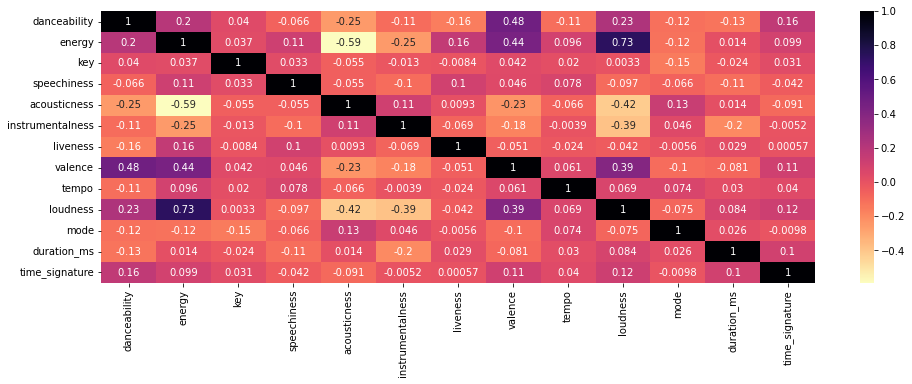

In [31]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

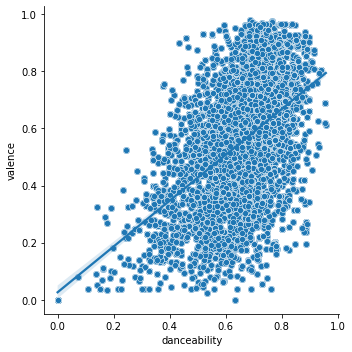

In [32]:
sns.lmplot(x="danceability",y="valence", data=df);
sns.scatterplot(x="danceability",y="valence", data=df);

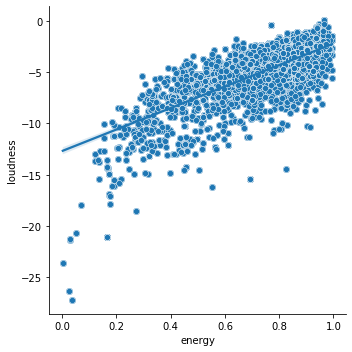

In [33]:
sns.lmplot(x="energy",y="loudness", data=df);
sns.scatterplot(x="energy",y="loudness", data=df);

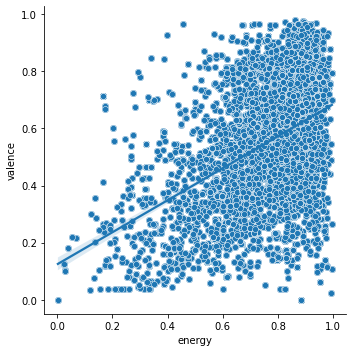

In [34]:
sns.lmplot(x="energy",y="valence", data=df);
sns.scatterplot(x="energy",y="valence", data=df);

In [35]:
df['target'] = [1 if i == 'bts' else 0 for i in df.artist_name]
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
5979    0
5980    0
5981    0
5982    0
5983    0
Name: target, Length: 5984, dtype: int64

In [36]:
df.corr()['target'].sort_values()

danceability       -0.166554
acousticness       -0.142900
mode               -0.106347
instrumentalness   -0.093666
liveness           -0.091438
valence            -0.091300
loudness           -0.074586
time_signature     -0.044008
tempo              -0.017158
key                 0.005927
energy              0.011547
duration_ms         0.162931
speechiness         0.219510
target              1.000000
Name: target, dtype: float64

In [37]:
df.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean'}).sort_values('speechiness', ascending = False)

speechiness  instrumentalness  danceability    energy  \
artist_name                                                               
bts                  0.140292          0.005332      0.607638  0.763520   
stray kids           0.123945          0.019142      0.682117  0.808604   
astro                0.113485          0.025149      0.665245  0.717318   
monsta x             0.113213          0.011062      0.662698  0.786596   
nct 127              0.103005          0.031032      0.661843  0.766117   
mamamoo              0.091409          0.031082      0.640428  0.720699   
blackpink            0.090646          0.014259      0.664980  0.707219   
wanna one            0.090505          0.000000      0.601189  0.777432   
itzy                 0.089586          0.095339      0.775387  0.821787   
exo                  0.087491          0.026118      0.621045  0.780778   
got7                 0.085426          0.019951      0.700694  0.778833   
red velvet           0.083798          0.101727      0.631260  0.711803   
twice                0.080698          0.028084      0.722780  0.802729   
winner               0.079064          0.003386      0.642450  0.740734   
exid                 0.070910          0.131959      0.675412  0.759663   
girls generation     0.070435          0.054738      0.663149  0.785112   
gfriend              0.058144          0.247166      0.603519  0.709930   
everglow             0.055478          0.312075      0.593176  0.657784   

                  acousticness  
artist_name                     
bts                   0.111164  
stray kids            0.100678  
astro                 0.202674  
monsta x              0.132459  
nct 127               0.158400  
mamamoo               0.365692  
blackpink             0.160491  
wanna one             0.181265  
itzy                  0.065938  
exo                   0.184433  
got7                  0.136182  
red velvet            0.236088  
twice                 0.152908  
winner                0.241950  
exid                  0.214600  
girls generation      0.244338  
gfriend               0.265350  
everglow              0.316899

<Figure size 1080x360 with 0 Axes>

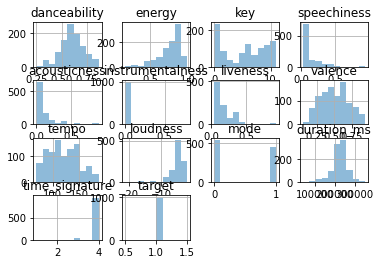

In [38]:
plt.figure(figsize = (15,5));
df[df.artist_name == 'bts']._get_numeric_data().hist(alpha = 0.5);
#subtitle('Histogram of all features related to songs by BTS', size = 10);

Text(0.5, 1.0, 'Target Based on Mode and Key')

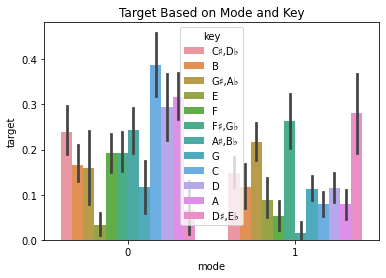

In [39]:
sns.barplot(x = 'mode', y = 'target', hue = key, data = df);
plt.title('Target Based on Mode and Key')

In [40]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [41]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")

In [42]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5984 samples in 0.020s...
[t-SNE] Computed neighbors for 5984 samples in 0.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5984
[t-SNE] Computed conditional probabilities for sample 2000 / 5984
[t-SNE] Computed conditional probabilities for sample 3000 / 5984
[t-SNE] Computed conditional probabilities for sample 4000 / 5984
[t-SNE] Computed conditional probabilities for sample 5000 / 5984
[t-SNE] Computed conditional probabilities for sample 5984 / 5984
[t-SNE] Mean sigma: 0.094457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.920372
[t-SNE] KL divergence after 300 iterations: 2.124487
t-SNE done! Time elapsed: 10.65735673904419 seconds


In [43]:
df = df.drop(columns=["release_date","song_name_formatted","song_name","artist_name","year"])

In [44]:
#training = df.sample(frac = 0.8,random_state = 420)

In [45]:
y = df.target
X = df.drop("target",axis=1)

In [46]:
X, y

(      danceability  energy  key  speechiness  acousticness  instrumentalness  \
 0            0.566   0.716    1       0.0424       0.00691          0.000000   
 1            0.764   0.526   11       0.2120       0.04840          0.000000   
 2            0.547   0.605    8       0.0415       0.42000          0.000000   
 3            0.703   0.321    4       0.8840       0.86400          0.000000   
 4            0.787   0.669    5       0.0428       0.00782          0.000000   
 ...            ...     ...  ...          ...           ...               ...   
 5979         0.745   0.951    5       0.0527       0.04280          0.003860   
 5980         0.790   0.853   11       0.0665       0.00116          0.000042   
 5981         0.745   0.951    5       0.0527       0.04280          0.003860   
 5982         0.790   0.853   11       0.0666       0.00116          0.000042   
 5983         0.745   0.951    5       0.0527       0.04280          0.003860   
 
       liveness  valence  

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 420)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      danceability  energy  key  speechiness  acousticness  instrumentalness  \
4827         0.704   0.826    6       0.1380      0.022100               0.0   
2952         0.405   0.248    8       0.0495      0.906000               0.0   
2633         0.651   0.748   11       0.3430      0.157000               0.0   
5129         0.725   0.826    0       0.0368      0.113000               0.0   
3344         0.899   0.610   10       0.2410      0.000557               0.0   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  
4827    0.0803    0.803  107.523    -2.195     0       257280               4  
2952    0.9550    0.133  118.060   -12.816     0       232560               4  
2633    0.1020    0.767  167.964    -3.764     0       206430               4  
5129    0.1260    0.424  116.931    -3.588     0       190794               4  
3344    0.1110    0.341  156.012    -8.694     0       166161               4  
(4488, 13)

X_test:

      d

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predict)
print("Accuracy: " + str(log_reg_accuracy))
log_reg_f1_score = mt.f1_score(y_test, log_reg_predict)
log_reg_AUC = roc_auc_score(y_test, log_reg_predict) 
print("AUC: " + str(log_reg_AUC))
print("F1 Score: ", log_reg_f1_score)

Accuracy: 0.8308823529411765
AUC: 0.4995980707395498
F1 Score:  0.0


In [49]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predict = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predict)
print("Accuracy: " + str(random_forest_accuracy))
random_forest_f1_score = mt.f1_score(y_test, random_forest_predict)
random_forest_AUC = roc_auc_score(y_test, random_forest_predict) 
print("AUC: " + str(random_forest_AUC))
print("F1 Score: ", random_forest_f1_score)

Accuracy: 0.9926470588235294
AUC: 0.97975680089828
F1 Score:  0.9777777777777779


In [50]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
print("Accuracy: " + str(knn_accuracy))
knn_f1= mt.f1_score(y_test, knn_predict)
knn_AUC = roc_auc_score(y_test, knn_predict) 
print("AUC: " + str(knn_AUC))
print("F1 Score: ", knn_f1)

Accuracy: 0.9171122994652406
AUC: 0.8789618741387231
F1 Score:  0.7695167286245354


In [51]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predict = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predict)
print("Accuracy: " + str(decision_tree_accuracy))
decision_tree_f1_score = mt.f1_score(y_test, decision_tree_predict)
decision_tree_AUC = roc_auc_score(y_test, decision_tree_predict) 
print("AUC: " + str(decision_tree_AUC))
print("F1 Score: ", decision_tree_f1_score )

Accuracy: 0.9659090909090909
AUC: 0.9668440259276272
F1 Score:  0.9053803339517624


In [52]:
XGB_model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_model.fit(X_train, y_train)
XGB_predict = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_predict)
print("Accuracy: " + str(XGB_accuracy))
XGB_f1_score= mt.f1_score(y_test, XGB_predict)
XGB_AUC = roc_auc_score(y_test, XGB_predict) 
print("AUC: " + str(XGB_AUC))
print("F1 Score: ", XGB_f1_score)

[00:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9625668449197861
AUC: 0.923697238809779
F1 Score:  0.8861788617886179


C:\Users\HILAL-PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [53]:
model_performance = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'XGBClassifier'],
                                           
                                            'Accuracy': [log_reg_accuracy ,
                                                         random_forest_accuracy,
                                                         knn_accuracy,
                                                         decision_tree_accuracy,
                                                         XGB_accuracy],
                                  
                                                  'AUC': [log_reg_AUC,
                                                         random_forest_AUC,
                                                         knn_AUC,
                                                         decision_tree_AUC,
                                                         XGB_AUC],
                                  
                                                  'F1_Score': [log_reg_f1_score,
                                                         random_forest_f1_score,
                                                         knn_f1,
                                                         decision_tree_f1_score,
                                                         XGB_f1_score],
                                  
                                          })


In [54]:
model_performance

Model  Accuracy       AUC  F1_Score
0      LogisticRegression  0.830882  0.499598  0.000000
1  RandomForestClassifier  0.992647  0.979757  0.977778
2    KNeighborsClassifier  0.917112  0.878962  0.769517
3  DecisionTreeClassifier  0.965909  0.966844  0.905380
4           XGBClassifier  0.962567  0.923697  0.886179

In [55]:
model_performance.sort_values(by = "AUC", ascending = False)

Model  Accuracy       AUC  F1_Score
1  RandomForestClassifier  0.992647  0.979757  0.977778
3  DecisionTreeClassifier  0.965909  0.966844  0.905380
4           XGBClassifier  0.962567  0.923697  0.886179
2    KNeighborsClassifier  0.917112  0.878962  0.769517
0      LogisticRegression  0.830882  0.499598  0.000000

### Random Forest Classifier is the best model for our project!

In [56]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

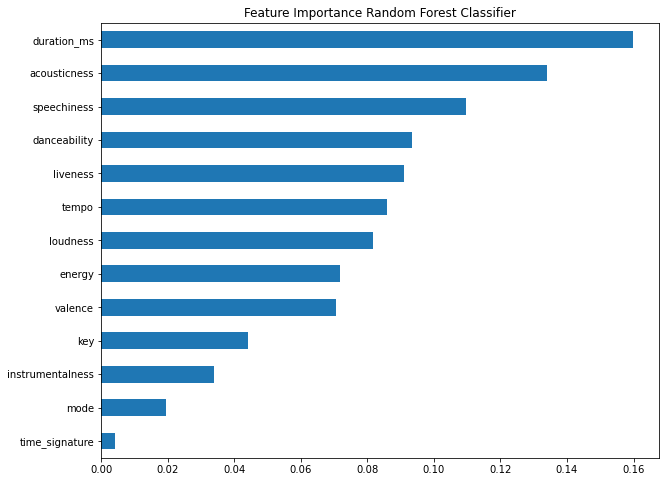

In [73]:
importance_series = pd.Series(data=random_forest_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8))
ax.set_title('Feature Importance Random Forest Classifier');

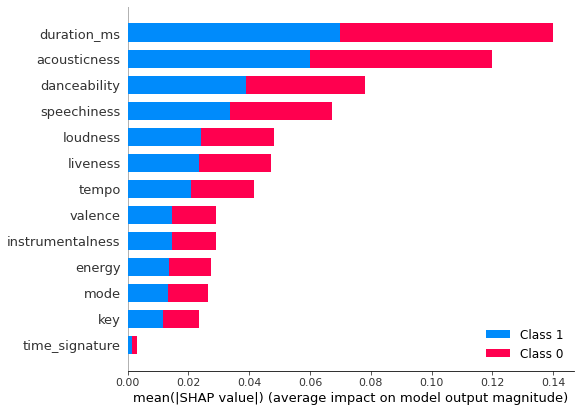

In [81]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)